<b><font size="5">Problem Set 3</font></b>

<b>Context</b> : Consider the dataset '[Impact of COVID-19 on worldwide aviation](https://zenodo.org/record/4088202#.X5NaZXVKgio)', which concerns the impact of global pandemic on the airline industry.

<b>Task</b>: Create <b>ONE</b> Matplotlib figure that illustrates the effect of the global pandemic on the airline industry. There are no constraints about the dimensions to include in the figure ― in other words, students are free to emphasize the aspects they find more interesting. However, the plot(s) included in the Matplotlib figure(s) must include the temporal dimension.

<b>Submission</b>: Submit your solution via email to simone.santoni.1@city.ac.uk. Late submissions (> October 28, 2020) may not be considered for the in-class presentations.

<b><font size="5">Description of the dataset</font></b>

One file per month is provided as a csv file with the following features:

- callsign: the identifier of the flight displayed on ATC screens (usually the first three letters are reserved for an airline: AFR for Air France, DLH for Lufthansa, etc.)
- number: the commercial number of the flight, when available (the matching with the callsign comes from public open API)
- icao24: the transponder unique identification number;
- registration: the aircraft tail number (when available);
- typecode: the aircraft model type (when available);
- origin: a four letter code for the origin airport of the flight (when available);
- destination: a four letter code for the destination airport of the flight (when available);
- firstseen: the UTC timestamp of the first message received by the OpenSky Network;
- lastseen: the UTC timestamp of the last message received by the OpenSky Network;
- day: the UTC day of the last message received by the OpenSky Network;
- latitude_1, longitude_1, altitude_1: the first detected position of the aircraft;
- latitude_2, longitude_2, altitude_2: the last detected position of the aircraft.

# Import relevant libraries

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset

Datasets includes flight data from Jan to June in 2019 and 2020

In [2]:
# get datasets folder path
base_path = os.path.join(os.getcwd(), 'PS3_Data')   # locate the path where all the csv files are stored
data_2019_path = os.path.join(base_path, '2019')    # within the file, go to the 2019 folder
data_2020_path = os.path.join(base_path, '2020')    # within the file, go to the 2020 folder

# get datasets path
files_2019_path = glob.glob(os.path.join(data_2019_path, '*.csv.gz'))
files_2020_path = glob.glob(os.path.join(data_2020_path, '*.csv.gz'))

In [42]:
# import data
data_2019 = pd.concat(pd.read_csv(file) for file in files_2019_path)
data_2020 = pd.concat(pd.read_csv(file) for file in files_2020_path)

D:\Anaconda\envs\SMM635 - DV\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  


# Data Exploration and Processing

In [4]:
# inspect data structure
data_2019

,callsign,number,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2
0,HVN19,NaN,888152,NaN,NaN,YMML,LFPG,2018-12-31 00:43:16+00:00,2019-01-01 04:56:29+00:00,2019-01-01 00:00:00+00:00,-37.659485,144.804421,304.8,48.995316,2.610802,-53.34
1,CCA839,NaN,780ad1,NaN,NaN,YMML,LEBL,2018-12-31 00:53:08+00:00,2019-01-01 06:01:42+00:00,2019-01-01 00:00:00+00:00,-37.692123,144.841997,304.8,41.036124,2.063557,1112.52
2,CES219,NaN,780b7e,B-5936,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2019-01-01 00:00:00+00:00,-33.930908,151.171987,0.0,50.045563,8.588923,-15.24
3,AEA040,NaN,34444e,EC-LVL,A332,LEMD,LEMD,2018-12-31 01:07:21+00:00,2019-01-01 03:32:59+00:00,2019-01-01 00:00:00+00:00,40.534756,-3.575426,609.6,40.475728,-3.538347,411.48
4,CXA825,NaN,780d75,B-2760,B788,YSSY,LFPG,2018-12-31 01:18:29+00:00,2019-01-01 04:32:28+00:00,2019-01-01 00:00:00+00:00,-33.954254,151.178041,0.0,48.996091,2.625805,22.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660896,RDF11,NaN,a6c7cf,N536ME,NaN,K29D,K29D,2019-06-30 23:46:12+00:00,2019-06-30 23:57:55+00:00,2019-06-30 00:00:00+00:00,41.139862,-80.148315,304.8,41.145894,-80.156625,487.68
2660897,TAO407,NaN,0d0acb,NaN,NaN,MMMX,NaN,2019-06-30 23:46:15+00:00,2019-06-30 23:58:18+00:00,2019-06-30 00:00:00+00:00,19.459022,-99.032959,2438.4,18.930313,-98.901623,6096.00
2660898,DAL2408,NaN,a9073a,N681DA,B752,KATL,NaN,2019-06-30 23:46:28+00:00,2019-06-30 23:57:05+00:00,2019-06-30 00:00:00+00:00,33.634460,-84.502912,914.4,32.857315,-84.004431,7200.90
2660899,UEA2735,NaN,780eb4,B-8162,A320,NaN,NaN,2019-06-30 23:46:53+00:00,2019-06-30 23:57:09+00:00,2019-06-30 00:00:00+00:00,30.341171,106.618545,8839.2,29.769411,107.839750,8854.44


In [43]:
# subset necessary columns
data_2019 = data_2019[['callsign', 'day']]
data_2020 = data_2020[['callsign', 'day']]                     

## Filter ANA data

In [62]:
# focus on All Nippon Airways (ANA)
ANA_2019 = data_2019[data_2019['callsign'].str.contains('ANA')]
ANA_2020 = data_2020[data_2020['callsign'].str.contains('ANA')]

In [63]:
# reset index
ANA_2019.reset_index(drop=True, inplace = True)
ANA_2020.reset_index(drop=True, inplace = True)

In [64]:
ANA_2019

,callsign,day
0,ANA106,2019-01-01 00:00:00+00:00
1,ANA10,2019-01-01 00:00:00+00:00
2,ANA203,2019-01-01 00:00:00+00:00
3,ANA1,2019-01-01 00:00:00+00:00
4,ANA216,2019-01-01 00:00:00+00:00
...,...,...
104683,ANA15,2019-06-30 00:00:00+00:00
104684,ANA16,2019-06-30 00:00:00+00:00
104685,ANA577,2019-06-30 00:00:00+00:00
104686,ANA86,2019-06-30 00:00:00+00:00


## Create year and month columns

In [71]:
# extract date from the df
date = pd.to_datetime(ANA_2019['day'])

# date 
ANA_2019.loc[:, 'date'] = date.dt.strftime('%Y-%m-%d')
# year
ANA_2019.loc[:, 'year'] = date.dt.strftime('%Y')
# month
ANA_2019.loc[:, 'month'] = date.dt.strftime('%m')

ANA_2019.head()

D:\Anaconda\envs\SMM635 - DV\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda\envs\SMM635 - DV\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,callsign,day,date,year,month
0,ANA106,2019-01-01 00:00:00+00:00,2019-01-01,2019,01
1,ANA10,2019-01-01 00:00:00+00:00,2019-01-01,2019,01
2,ANA203,2019-01-01 00:00:00+00:00,2019-01-01,2019,01
3,ANA1,2019-01-01 00:00:00+00:00,2019-01-01,2019,01
4,ANA216,2019-01-01 00:00:00+00:00,2019-01-01,2019,01


In [73]:
# data only contains data from Jan to June
ANA_2019.month.unique()

array(['01', '02', '03', '04', '05', '06'], dtype=object)

In [74]:
# extract date from the df
date = pd.to_datetime(ANA_2020['day'])

# date 
ANA_2020.loc[:, 'date'] = date.dt.strftime('%Y-%m-%d')
# year
ANA_2020.loc[:, 'year'] = date.dt.strftime('%Y')
# month
ANA_2020.loc[:, 'month'] = date.dt.strftime('%m')

ANA_2020.head()

D:\Anaconda\envs\SMM635 - DV\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda\envs\SMM635 - DV\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,callsign,day,date,year,month
0,ANA106,2020-01-01 00:00:00+00:00,2020-01-01,2020,01
1,ANA1,2020-01-01 00:00:00+00:00,2020-01-01,2020,01
2,ANA10,2020-01-01 00:00:00+00:00,2020-01-01,2020,01
3,ANA203,2020-01-01 00:00:00+00:00,2020-01-01,2020,01
4,ANA205,2020-01-01 00:00:00+00:00,2020-01-01,2020,01


In [75]:
# data only contains data from Jan to June
ANA_2020.month.unique()

array(['01', '02', '03', '04', '05', '06'], dtype=object)

## Get frequency data

In [76]:
df_2019 = pd.DataFrame(ANA_2019.groupby(['year', 'month'])['callsign'].agg('count'))
df_2019

callsign
year month          
2019 01        19544
     02        16981
     03        17126
     04        17175
     05        17548
     06        16314

In [77]:
df_2020 = pd.DataFrame(ANA_2020.groupby(['year', 'month'])['callsign'].agg('count'))
df_2020

callsign
year month          
2020 01        18451
     02        16339
     03        15230
     04         7048
     05         2988
     06         5738

## Stats about % drop

In [81]:
jan_drop = ((df_2020.callsign[0]-df_2019.callsign[0])/df_2019.callsign[0]) * 100
feb_drop = ((df_2020.callsign[1]-df_2019.callsign[1])/df_2019.callsign[1]) * 100
mar_drop = ((df_2020.callsign[2]-df_2019.callsign[2])/df_2019.callsign[2]) * 100
apr_drop = ((df_2020.callsign[3]-df_2019.callsign[3])/df_2019.callsign[3]) * 100
may_drop = ((df_2020.callsign[4]-df_2019.callsign[4])/df_2019.callsign[4]) * 100
jun_drop = ((df_2020.callsign[5]-df_2019.callsign[5])/df_2019.callsign[5]) * 100

In [110]:
# summary text
sum_text = " - Jan: {:.2f}%\n - Feb: {:.2f}%\n - March: {:.2f}%\n - April: {:.2f}%\n - May: {:.2f}%\n - June: {:.2f}% ".format(jan_drop, feb_drop, mar_drop, apr_drop, may_drop, jun_drop)

# Visualisation

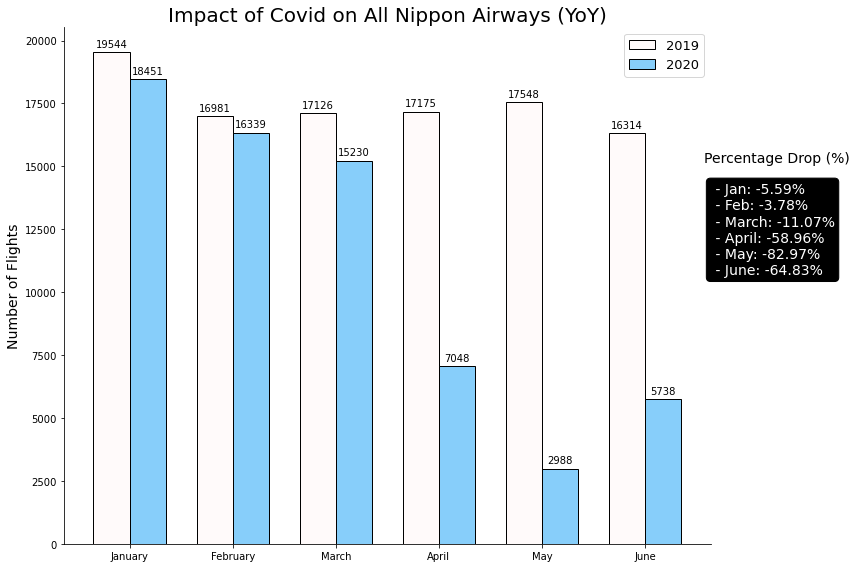

In [121]:
fig = plt.figure(figsize = (12, 8))

ax = fig.add_subplot(1, 1, 1)

# label title
x_axis_labels = ['January', 'February', 'March', 'April', 'May', 'June']

# data to plot
ANA2019 = list(df_2019['callsign'])
ANA2020 = list(df_2020['callsign'])

# label locations
x = np.arange(len(x_axis_labels))

# width of bars
width = 0.35

# populate the data into the plot
rects1 = ax.bar(x - width/2, ANA2019, width, label='2019', color='snow', edgecolor = 'k')
rects2 = ax.bar(x + width/2, ANA2020, width, label='2020', color = 'lightskyblue', edgecolor = 'k')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Flights', fontsize=14)
ax.set_title('Impact of Covid on All Nippon Airways (YoY)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(x_axis_labels)
ax.legend(fontsize=13)

# Attach figure above each bar
def autolabel(rects):    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# add text box
props = dict(boxstyle='round', facecolor='k')

# place a text box 
ax.text(1, 0.7, sum_text, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props, color = 'w')

# add textbox title
ax.text(0.99, 0.76, "Percentage Drop (%)", transform=ax.transAxes, fontsize=14,
        verticalalignment='top', color = 'k')

fig.tight_layout()

plt.show()